In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

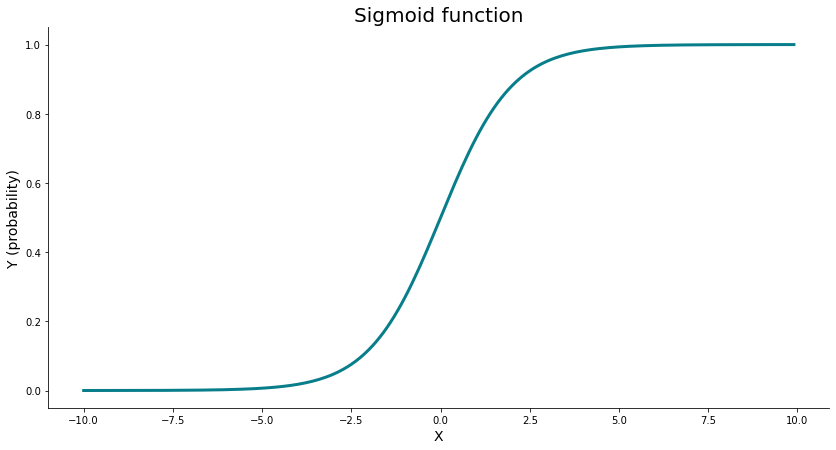

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xs = np.arange(-10, 10, 0.1)
ys = [sigmoid(x) for x in xs]

plt.plot(xs, ys, c='#087E8B', lw=3)
plt.title('Sigmoid function', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y (probability)', size=14)
plt.savefig('003_LogisticRegression_sigmoid_function.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
def binary_cross_entropy(y, y_hat):
    def safe_log(x): return 0 if x == 0 else np.log(x)
    total = 0
    
    for curr_y, curr_y_hat in zip(y, y_hat):
        total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
    return - total / len(y)


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
np.log(0)

-inf

In [9]:
binary_cross_entropy(y=[1, 0], y_hat=[0.9, 0.1])

0.10536051565782628

In [10]:
binary_cross_entropy(y=[1, 0], y_hat=[0.1, 0.9])

2.302585092994046

In [20]:
class LogisticRegression:
    '''
     A class which implements logistic regression model with gradient descent.
    '''
def __init__(self, learning_rate=0.1, n_iterations=1000):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.weights, self.bias = None, None
    
@staticmethod
def _sigmoid(x):
    '''
    Private method, used to pass results of the line equation through the sigmoid function.
    :param x: float, prediction made by the line equation
    :return: float
    '''
    return 1 / (1 + np.exp(-x))
    
    
@staticmethod
def _binary_cross_entropy(y, y_hat):
    '''
    Private method, used to calculate binary cross entropy value between actual classes
    and predicted probabilities.
    :param y: array, true class labels
    :param y_hat: array, predicted probabilities
    :return: float
    '''
def safe_log(x):
    return 0 if x == 0 else np.log(x)
total = 0

for curr_y, curr_y_hat in zip(y, y_hat):
    total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
return - total / len(y)   

def fit(self, X, y):
    '''
    Used to calculate the coefficient of the logistic regression model.
    :param X: array, features
    :param y: array, true values
    :return: None
    '''

# 1. Initialize coefficients
    self.weights = np.zeros(X.shape[1])
    self.bias = 0
# 2. Perform gradient descent
    for i in range(self.n_iterations):
        linear_pred = np.dot(X, self.weights) + self.bias
        probability = self._sigmoid(linear_pred)
        
        # Calculate derivatives
        partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (probability - y)))
        partial_d = (1 / X.shape[0]) * (2 * np.sum(probability - y))
        # Update the coefficients
        self.weights -= self.learning_rate * partial_w
        self.bias -= self.learning_rate * partial_d

def predict_proba(self, X):
    '''
    Calculates prediction probabilities for a given threshold using the line equation
    passed through the sigmoid function.
   :param X: array, features
   :return: array, prediction probabilities
    '''
    linear_pred = np.dot(X, self.weights) + self.bias
    return self._sigmoid(linear_pred)

def predict(self, X, threshold=0.5):
    '''
    Makes predictions using the line equation passed through the sigmoid function.
    :param X: array, features
    :param threshold: float, classification threshold
    :return: array, predictions
    '''
    probabilities = self.predict_proba(X)
    return [1 if i > threshold else 0 for i in probabilities]


NameError: name 'y' is not defined

In [21]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
#model.weights

In [ ]:
#model.bias

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
accuracy_score(y_test, preds)

0.956140350877193

In [30]:
print(confusion_matrix(y_test, preds))

[[39  4]
 [ 1 70]]


In [40]:
#evals = []

#for thresh in np.arange(0, 1.01, 0.01):
#    preds = model.predict(X_test, threshold=thresh)
#    acc = accuracy_score(y_test, preds)
#    evals.append({'Threshold': thresh, 'Accuracy': acc})


In [33]:
import pandas as pd
evals_df = pd.DataFrame(evals)

best_thresh = evals_df.sort_values(by='Accuracy', ascending=False).iloc[0]

plt.plot(evals_df['Threshold'], evals_df['Accuracy'], lw=3, c='#087E8B')
plt.scatter(best_thresh['Threshold'], best_thresh['Accuracy'], label=f"Best threshold = {best_thresh['Threshold']}, Accuracy = {(best_thresh['Accuracy'] * 100):.2f}%", s=250, c='#087E8B')
plt.title('Threshold Optimization', size=20)
plt.xlabel('Threshold', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend()
plt.savefig('images/003_LogisticRegression_threshold_optimization.png', dpi=300,
bbox_inches='tight')
plt.show()


KeyError: 'Accuracy'

In [41]:
#model = LogisticRegression()
#model.fit(X_train, y_train)
#preds = model.predict(X_test, threshold=0)

In [42]:
accuracy_score(y_test, preds)

0.956140350877193

In [36]:
print(confusion_matrix(y_test, preds))

[[39  4]
 [ 1 70]]


In [37]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [38]:
accuracy_score(y_test, lr_preds)

0.956140350877193

In [39]:
print(confusion_matrix(y_test, lr_preds))

[[39  4]
 [ 1 70]]
